# Using raster analysis

Raster Analysis can be used to create and execute spatial analysis models and image processing chains which leverage distributed storage and analysis. This powerful capability is available with ArcGIS Enterprise, and enables scalable raster analysis including terrain analysis, suitability analysis, vegetation analysis as well as persistent imagery product generation.

The `arcgis.raster.analytics` module provides the raster analysis functionality. This module contains functions that enable you to call raster analysis tools in your GIS.

## About the raster analysis tools

There are many tools available to perform raster analysis such as:

* **Calculate Density** creates a density layer from point features by spreading known quantities of some phenomenon (represented as attributes of the points) across the raster. The result is a layer of areas classified from least dense to most dense.
* **Classify** categorizes your raster layer into logical categories.
* **Convert Feature To Raster** is used to convert a vector feature class into a raster layer.
* **Convert Raster To Feature** is used to convert a raster layer into a feature class.
* **Copy Raster** is used to create a copy of a raster layer. The new raster layer can be clipped, resampled, or reprojected.
* **Create Viewshed** determines the raster surface locations visible to a set of observer features.
* **Generate Raster** can employ any of the raster functions as raster analytic tools. You can use these to create processed raster datasets from functions and function chains.
* **Interpolate Points** is used to convert irregularly gridded point datasets or multidimensional datasets into raster surfaces.
* **Summarize Raster Within** summarizes a raster based on areas (zones) you define with another layer.
* **Segment** identifies features or segments in your imagery by grouping adjacent pixels together that have similar spectral characteristics.
* **Train Classifier** sets up your classification based on your classification algorithm and parameters.

To get an exhaustive list of raster functions, please refer to [`arcgis.raster.analytics`](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.raster.analytics.html) module.

## Verifying if GIS supports raster analysis

Raster Analysis is available in GIS if raster analytics server is configured and enabled. ArcGIS Online does not yet support raster analysis. To verify if your GIS has raster analysis capability, use the `arcgis.raster.analytics.is_supported(gis)` method. This function returns True if the GIS supports raster analysis. If a gis isn’t specified, it checks if arcgis.env.active_gis supports raster analysis:

In [44]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

arcgis_online = GIS()

In [45]:
arcgis.raster.analytics.is_supported(arcgis_online)

False

Please replace the credentials below with that of your org. To learn more about profiles, see [here](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/#Storing-your-credentialls-locally).

In [70]:
portal = GIS(profile='your_enterprise_profile')

In [71]:
arcgis.raster.analytics.is_supported(portal)

True

## Creating persistent imagery product using raster analysis

This part of the notebook shows how Raster Analysis can be used to generate a raster information product, by applying the same raster function across the extent of an image service on the portal.

An imagery layer containing landsat scenes covering the burned areas from the Montana fires is used as an input for producing the imagery product:

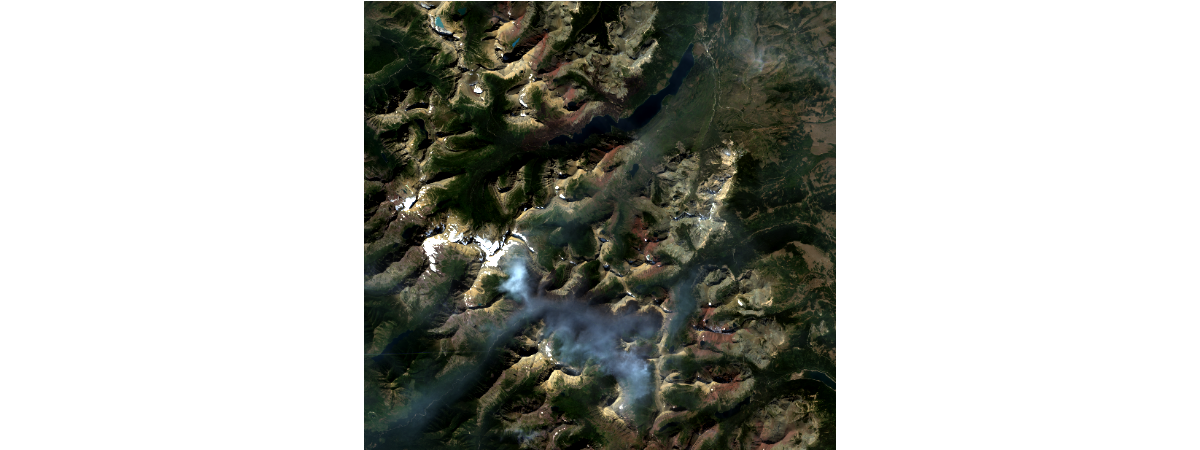

In [48]:
montana_landsat = portal.content.search("ImgSrv_Landast_Montana2015")[0].layers[0]
montana_landsat

### Using `save()` to create imagery product

In the code below, we use `extact_bands` raster function to extract the [7, 5, 2] band combination and improve the contrast using `stretch()`. This improves visibility of fire and burn scars by pushing further into the SWIR range of the electromagnetic spectrum, as there is less susceptibility to smoke and haze generated by a burning fire.

The raster function is applied at source resolution and creates an information product when you `save()` the image.

In [49]:
from arcgis.raster.functions import stretch, extract_band
montana_fires = stretch(extract_band(montana_landsat, [7, 5, 2]), 
                        stretch_type='percentclip', 
                        min_percent=0.1, 
                        max_percent=0.1, 
                        gamma=[1, 1, 1], 
                        dra=True)

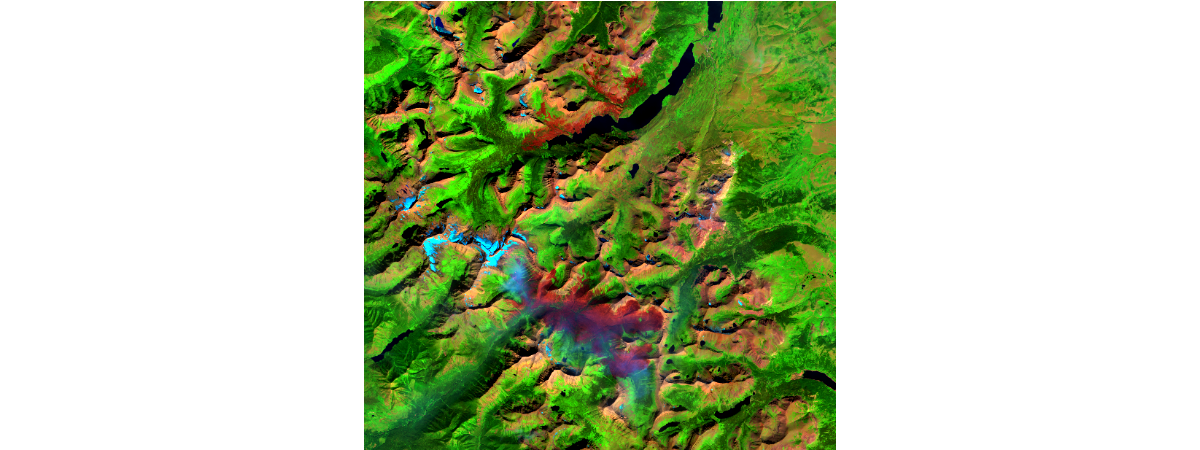

In [50]:
montana_fires

In [51]:
from datetime import datetime

montana_fires_result = montana_fires.save('Test_' + str(datetime.now().microsecond)) # give it a unique id
montana_fires_result

<Item title:"Test_739528" type:Imagery Layer owner:arcgis_python>

### Visualizing the generated imagery product

We can compare the natural color and false color images.
In the false color image the red and brownish pixels correspond to burn scars of the fire:

In [52]:
location = arcgis.geocoding.geocode("Marthas Basin, Montana")[0]

In [ ]:
natural_color_map = portal.map(location, 12)
natural_color_map.add_layer(montana_landsat)


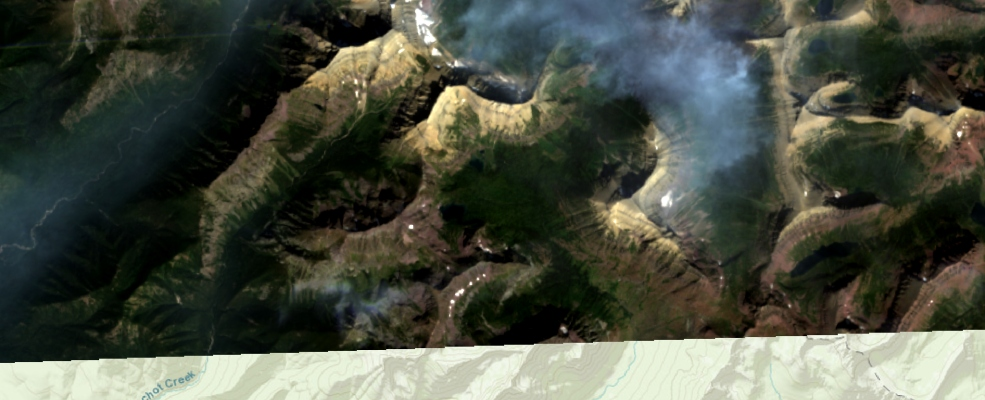

In [61]:
natural_color_map

In [ ]:
false_color_map = portal.map(location, 12)
false_color_map.add_layer(montana_fires)
false_color_map


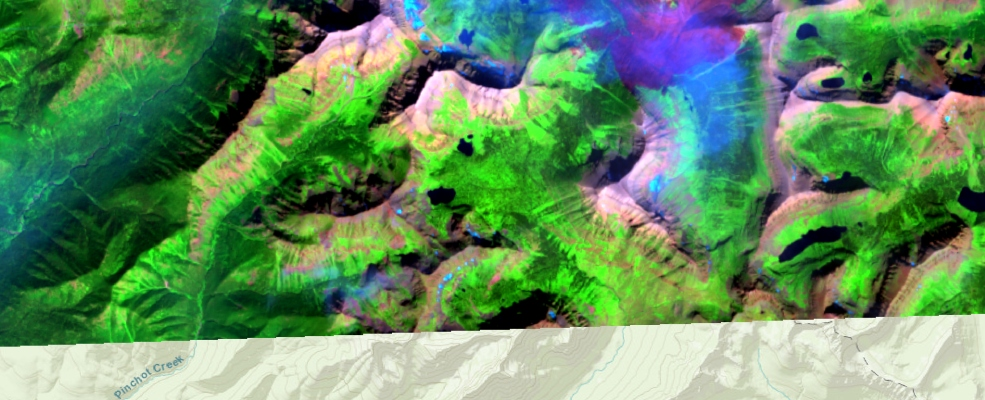

In [62]:
false_color_map

## Vegetation analysis

The `band_arithmetic()` tool allows you to perform user-defined map algebra. All you need to do is to specify your own formula. Here is a helpful resource for some [well-known raster functions](http://resources.arcgis.com/en/help/rest/apiref/index.html?israsterfunctions.html)

The example below creates an information product that uses NDVI. The normalized difference vegetation index (NDVI) is a simple graphical indicator that can be used to analyze remote sensing measurements, typically but not necessarily from a space platform, and assess whether the target being observed contains live green vegetation or not.

In [23]:
from arcgis.raster.functions import *

montana_ndvi = band_arithmetic(montana_landsat, "(b1 - b2) / (b1 + b2)")

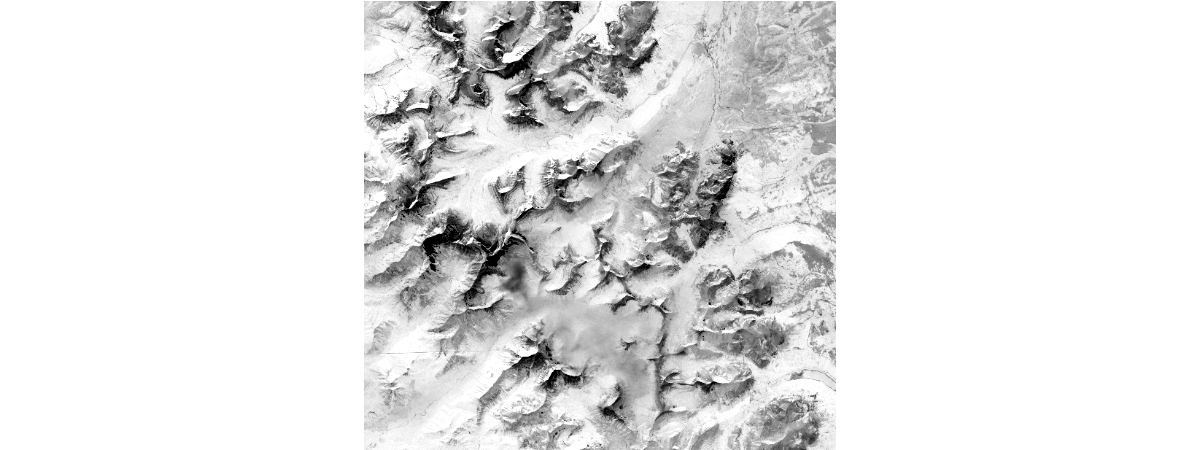

In [24]:
montana_ndvi

In [ ]:
ndvi_map = portal.map(location, 12)
ndvi_map

![montana ndvi](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_raster_analysis_02.png)

In [26]:
ndvi_map.add_layer(montana_ndvi)